# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [29]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg
import matplotlib as mpl
# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

print data.var()

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185
Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64


## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:**PCA**:First PCA dimension should be an combine of some or all attributes and with most variance, it seems that Fresh and Grocery should take more weights in first pricipal component, and Delicatessen seems with less variance and should be with less weight in the combination.<br>
**ICA**: All vectores in ICA dimensions should be independent and should lose as lillte as possible information after computing ICA.For this dataset, the dimensions should also some combination of the observable feature, and the new dimensions should be the underline nature of the data, for example, there may be a kind of customers runing a milk shop perfer by milk, so there will be a vector in the ICA dimensions with most milk wighted and less other.


### PCA

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


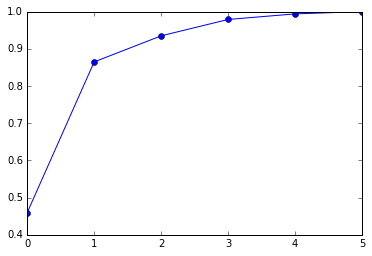

In [30]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=data.shape[1]).fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_
x = np.arange(6)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o')

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 1.The variance drop suddenly about the second dimension, and stays very low after that.<br>
2.I will choose the first two demensions, because the total amount of them is up to 0.865, so we just lose a little information by cutting the last three component.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The all dimensions are the bases of the new feature spcaces, where we put the feature(combine of primal feature) with most variance in the first base and so on, so the first few dimensions are the principle bases of the new feature spaces. <br > We can project the primal data in the new coordinates and get new data, and for the new data it is okey to remove last some values.
<br>**For this problem and dataset** <br>
The first principle vector is [-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471], as said in[1], we know that the a correlation value above 0.5 is deemed important. $P_1=-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471)*data(i)$, so this component can be viewed as a measure of  how much a customer **buy** Fresh in a verse direction. And it can prevent a little some information about the amount frozen and milk.
<br> The second priciple vector is[-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]. We can know that this component can be viewed as a measure of how a family want to buy Grocery, milk and detergent_paper where Grocery take a more important role.
<br> So as a result we can classify customer by the amount of a family buy fresh and the weighted sum of Grocery and milk. And Frozen ,Detergents_Paper and Delicatessen is less useful in clustering.

### ICA

[[ -8.64701884e-07  -1.32472583e-07   7.66632187e-07   1.11457828e-05
   -5.44443539e-07  -5.94302932e-06]
 [  2.87555745e-07  -2.28960592e-06  -1.19456780e-05   1.46948017e-06
    2.81908133e-05   5.67335946e-06]
 [ -3.88315066e-07  -2.62774230e-07  -5.74412721e-07  -5.28910586e-07
    4.91926742e-07   1.81241665e-05]
 [ -1.56265533e-07  -9.85525203e-06   5.74554221e-06   3.85548128e-07
   -3.16517452e-06   6.00389022e-06]
 [  3.97673781e-06  -8.80041676e-07  -6.79145581e-07  -6.72492329e-07
    2.18624800e-06  -9.99134851e-07]
 [ -2.08681938e-07   1.84028876e-06  -6.68905442e-06  -3.75920027e-07
    1.42019742e-06   1.57389368e-06]]


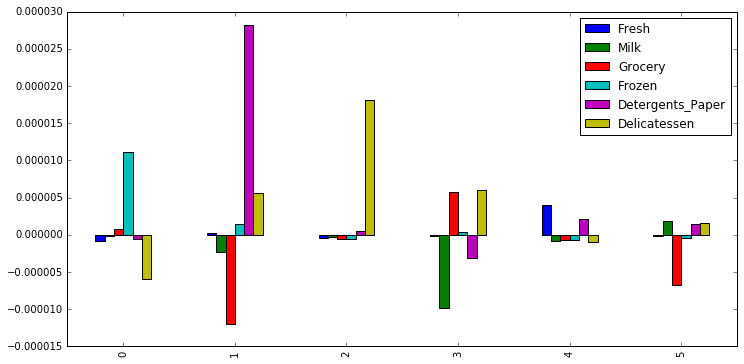

In [31]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA(n_components = data.shape[1], random_state = 8).fit(data)

# Print the independent components
print ica.components_
pd.DataFrame(ica.components_, columns = data.columns).plot(kind = 'bar', figsize = (12, 6))

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: The sort of ICA component is not vary important, because ICA just find the independent features and pay no attention to the importance of each features.
<br> We can find the underline sturcutre of the observable data by ICA. There may be five(or less) different kinds of customers, which are independent to buy goods. <br>

0. the zero buy frozen and no Delicatessen or purchase Delicatessen but less frozen;
1. For the first component, it may be a kind of customer who prefer to buy Detergents_Paper  and do not buy Geocery or a kind of customer who prefer to buy Geocery and do not buy Detergents_Paper;
2. and the second may be who prefer Delicatessen or one would not like to purchase Delicatessen;
3. And the third likes buying milk and Detergents_Paper but no Geocery nor Delicatessen, or buy it total inverse way;

**Usage**
Each component represents a kind of customer, so we can know how many different kind of customers there is and we canknow their in buying, so we can give better service to them and get more incomes. And we also can classify a new customer by his shopping habit in future with the kown ICA information by the method discussed in the question 10.




## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: **Advantages and disadvantages** 
<br>Advantage of KMeans
1. KMeans is an easy to understant and realize method to cluster datas, 
2. can converge

<br>there are three disanvantages of it:

1. the number of clusters should be assigned by human;
2. may encounter bad local min depending on the intial center points; 
3. It is a hard clustering method which means that a data can only belong to one class, if there some data have similar distance to more than one centers, it will be a problem to identify which class it between.

<br> GMM is one of EM, and assume that datas belong to some Gaussian distribution models and the models is unknown.
<br> Advantage

1. It is soft clustering(one of the advantage),
2. besides as the iteration goes on, it always move to an better direction and do not diverge.

Disadvantage:
<br>

1. first same as Kmeans, cluster amount should be assigned; 
2. secondly, it does not converage
3. may also encounter local min
4. assume the data satifies gaussian distribution

**Choice of Algorithm**
I think GMM may be the better algorithm for the problem and dataset for one reason.

1. We find that the data is separated with distinct gap, so it is difficult to assure the which cluster to belong for some datas. As a result a soft cluster method should be choosed.

**Number of clusters**

For the choice of clusters number, I think the best method is to try some method and compare them to select the best one. As for what the best is, it may be the one with large distance between different clusters and little distance inside each cluster. I have choose 2 is the number of clusters to get the best silhouette_score.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [32]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn import mixture

In [33]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation

pca=PCA(n_components=2).fit(data)
reduced_data =pca.transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [34]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
from sklearn.metrics import silhouette_score
import itertools
#clusters= KMeans(n_clusters=2)
clusters=GMM(n_components=2, init_params='wc', n_iter=20)


#try silhouette_score
best_score = -np.infty
score = []
n_components_range = range(2, 10)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = mixture.GMM(n_components=n_components, covariance_type=cv_type)
        gmm.fit(reduced_data)
        labels=gmm.predict(reduced_data)
        score.append(silhouette_score(reduced_data,labels))
        if score[-1] >best_score:
            best_score = score[-1]
            best_gmm = gmm
score = np.array(score)
clf = best_gmm
print 'silhouette_score:' 
print best_score
clusters = clf
#silhouette_score

print clusters

silhouette_score:
0.636642151457
GMM(covariance_type='tied', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [35]:
## Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])


[[  2547.17151832   -479.10469606]
 [-33469.83831273   6295.43656431]]
[[  9565.88650556   5240.46605892   7428.19682661   2692.80349451
    2724.42010554   1324.0491572 ]
 [ 43988.46554062  13099.47693584  14824.55527156   8053.6786702
    4945.43368549   4163.66266127]]


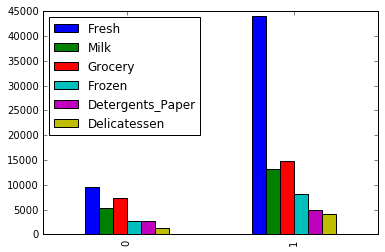

In [36]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

#centroids =clusters.cluster_centers_ 
centroids=clusters.means_
print centroids

print pca.inverse_transform(centroids)
pd.DataFrame(pca.inverse_transform(centroids), columns = data.columns).plot(kind = 'bar')

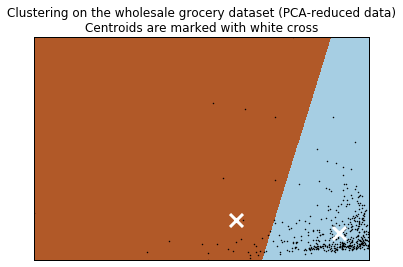

In [37]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 1.The centers are(2547.17151832, -479.10469606),(-33469.83831273,6295.43656431).
 <br> the are the mean of each cluster, indicate the mean purchase habit types of customers.
 After transforming the centers into original dimensions, they are  (9565.88650556,5240.46605892,7428.19682661,2692.80349451,2724.42010554,1324.0491572) and(43988.46554062,13099.47693584,14824.55527156,8053.6786702,4945.43368549,4163.66266127), we can find out that the second center is much bigger than first center for all entry. So they represent two different kinds of customers, one of which buy more and the other buy little. Both of the kinds of customers, they perfer buy more Fresh exspeically for the big customers. 
And the amount of Milk and Grocery is biger than that of Frozen,Detergents_Paper and Delicatessen
 <br>2. yes, may change the method of clustering which can automatic adjust parameter such as the number of clusters and so on.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: I think the technique which present the most insight of data should be ICA, which is designed to find the underline structure of data and give a transformation matrix showing how the observable data and latent independent data connect. For this problem, ICA can help us to discover different kind of customers with different shop habit and can provide the information of what do each kind of customers would like to buy.

**9)** How would you use that technique to help the company design new experiments?

Answer: First find the indenpend components, and cluster customers data by the new components with KMeans or EM method. Then we can know the which class does a custom belongs, and analsis the userd differently and design new experiments.
<br> As for the new experiment, A/B test is a choice[5], after we know which class each customer belong to, we can get which customers are similar, and it is principle point to compare two different plan using the feedback from similar customers. Then we choose the plan with better rate for each group of customers.

**10)** How would you use that data to help you predict future customer needs?

Answer: After get the clusters, we can take them as training data and train a classifer and predict which class a future customes belong and then know what they need. In detail, we can use the transformed PCA as the training feature, and the lable given by clustering as training lable, then using Decision tree or adaboost to trian a model.

**Reference**
<br>[1] Interpretation of the Principal Components https://onlinecourses.science.psu.edu/stat505/node/54
<br>[2]Trouble with PCA and ICA https://discussions.udacity.com/t/having-trouble-with-pca-and-ica-specifically-with-explaining-what-the-dimensions-mean/41890
<br>[3]cluster score http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
<br>[4]PCA http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.inverse_transform
<br>[5]A/B Test https://vwo.com/ab-testing/